In [1]:
som_features = [
    "Sample", "Gene", "Chr", "Start", "End", "Ref", "Alt",
    "Var1Depth", "Var1AltDepth", "Var1RefFwdReads", "Var1RefRevReads", "Var1AltFwdReads", "Var1AltRevReads", "Var1Genotype", "Var1AF",
    "Var1Bias", "Var1PMean", "Var1PStd", "Var1QMean", "Var1QStd", "Var1MQ", "Var1Sig_Noise", "Var1HiAF", "Var1ExtraAF", "Var1NM", "Var1Pvalue", "Var1Oddr",
    "Var2Depth", "Var2AltDepth", "Var2RefFwdReads", "Var2RefRevReads", "Var2AltFwdReads", "Var2AltRevReads", "Var2Genotype", "Var2AF",
    "Var2Bias", "Var2PMean", "Var2PStd", "Var2QMean", "Var2QStd", "Var2MQ", "Var2Sig_Noise", "Var2HiAF", "Var2ExtraAF", "Var2NM", "Var2Pvalue", "Var2Oddr",
    "shift3", "MSI", "MSI_NT", "5pFlankSeq", "3pFlankSeq", "Seg", "VarLabel", "VarType",
    "Duprate1", "SV_info1", "Duprate2", "SV_info2", "Pvalue", "Oddratio"
    ]
som_features_to_index = {
    "Sample":0, "Gene":1, "Chr":2, "Start":3, "End":4, "Ref":5, "Alt":6,
    "Var1Depth":7, "Var1AltDepth":8, "Var1RefFwdReads":9, "Var1RefRevReads":10, "Var1AltFwdReads":11, "Var1AltRevReads":12, "Var1Genotype":13, "Var1AF":14,
    "Var1Bias":15, "Var1PMean":16, "Var1PStd":17, "Var1QMean":18, "Var1QStd":19, "Var1MQ":20, "Var1Sig_Noise":21, "Var1HiAF":22, "Var1ExtraAF":23, "Var1NM":24, "Var1Pvalue":25, "Var1Oddr":26,
    "Var2Depth":27, "Var2AltDepth":28, "Var2RefFwdReads":29, "Var2RefRevReads":30, "Var2AltFwdReads":31, "Var2AltRevReads":32, "Var2Genotype":33, "Var2AF":34,
    "Var2Bias":35, "Var2PMean":36, "Var2PStd":37, "Var2QMean":38, "Var2QStd":39, "Var2MQ":40, "Var2Sig_Noise":41, "Var2HiAF":42, "Var2ExtraAF":43, "Var2NM":44, "Var2Pvalue":45, "Var2Oddr":46,
    "shift3":47, "MSI":48, "MSI_NT":49, "5pFlankSeq":50, "3pFlankSeq":51, "Seg":52, "VarLabel":53, "VarType":54,
    "Duprate1":55, "SV_info1":56, "Duprate2":57, "SV_info2":58, "Pvalue":59, "Oddratio":60
    }
som_selected_features = [
    "Var1Depth", "Var1AltDepth", "Var1RefFwdReads", "Var1RefRevReads", "Var1AltFwdReads", "Var1AltRevReads", "Var1AF",
    "Var1PMean", "Var1PStd", "Var1QMean", "Var1QStd", "Var1MQ", "Var1Sig_Noise", "Var1HiAF", "Var1ExtraAF", "Var1NM", "Var1Pvalue", "Var1Oddr",
    "Var2Depth", "Var2AltDepth", "Var2RefFwdReads", "Var2RefRevReads", "Var2AltFwdReads", "Var2AltRevReads", "Var2AF",
    "Var2PMean", "Var2PStd", "Var2QMean", "Var2QStd", "Var2MQ", "Var2Sig_Noise", "Var2HiAF", "Var2ExtraAF", "Var2NM", "Var2Pvalue", "Var2Oddr",
    "shift3", "MSI", "MSI_NT",
    "Pvalue", "Oddratio"
    ]
SOM_SNV_FEATURES = len(som_selected_features) + 1
SOM_INDEL_FEATURES = SOM_SNV_FEATURES + 3

In [2]:
type_to_label = {"SNV": 0, "Deletion": 1, "Insertion": 2, "Complex": 3}
varLabel_to_label = {
    "Germline":0, "StrongLOH":1, "LikelyLOH":2, "StrongSomatic":3, 
    "LikelySomatic":4, "AFDiff":5, "SampleSpecific":6
}
fe2i = som_features_to_index
fvc_sf = som_selected_features
def format_snv_data_item(jri, fisher):
    if not fisher:
        print("not support to train if you not run rabbitvar without --fiser!!")
        exit(-1)
    data = list()
    # key is chrom:pos like "chr1:131022:A:T"
    key = jri[2] + ":" + jri[3] + ":" + jri[5] + ":" + jri[6] #TODO: case sensitive
    for sf in fvc_sf:
        data.append(jri[fe2i[sf]])
    data.append(varLabel_to_label[jri[fe2i["VarLabel"]]])#varlabel
    #data.append(jri[fe2i["VarLabel"]])
    if len(data) != SOM_SNV_FEATURES:
        print("fvc data length error: \n", len(data), data, " ori\n", jri)
        exit(-1)
    return key, data


In [3]:
#---------------------------------indel processing function------------------------------------------#
def format_indel_data_item(jri, fisher):
    if not fisher:
        print("not support to train if you not run rabbitvar without --fiser!!")
        exit(-1)
    data = list()
    # key is chrom:pos like "chr1:131022:A:T"
    key = jri[2] + ":" + jri[3] + ":" + jri[5] + ":" + jri[6] #TODO: case sensitive
    data.append(len(jri[5]))
    data.append(len(jri[6]))
    data.append(type_to_label[jri[fe2i["VarType"]]])
    for sf in fvc_sf:
        data.append(jri[fe2i[sf]])
    data.append(varLabel_to_label[jri[fe2i["VarLabel"]]])#varlabel
    #data.append(jri[fe2i["VarLabel"]])
    if len(data) != SOM_INDEL_FEATURES:
        print("fvc data length error: \n", len(data), data, " ori\n", jri)
        exit(-1)
    return key, data

In [4]:
def get_label(truth_vars, key):
    if key in truth_vars:
        return 1
    else :
        return 0
    return 0

In [1]:
#----prepare label list----#
truth_file = "/home/old_home/haoz/workspace/data/FD/Truth/FDtruth_Data_1.indel.vcf"
truth_vars = set()
with open(truth_file, 'r') as f:
    for var in f:
        if var[0] == '#':
            continue
        items = var.split('\t')
        chrom, pos, id, ref, alt, _, filter = items[:7]         
        #if len(chrom) < 6 and filter == "PASS" and (len(ref) > 1 or len(alt) > 1) :
        if len(chrom) < 6:
            site = chrom + ":" + pos + ":" + ref + ":" + alt
            truth_vars.add(site)

FileNotFoundError: [Errno 2] No such file or directory: '/home/old_home/haoz/workspace/data/FD/Truth/FDtruth_Data_1.indel.vcf'

In [125]:
len(truth_vars)

1916

In [126]:
#--- prepare source datafram from file ---#
import sys
from multiprocessing import Process, Queue
import pandas as pd
import numpy as np
fastvc_file = "/home/old_home/haoz/workspace/FastVC/detection_result/FD_DATASET/FD_DATA_1.txt"
cr = list()
with open(fastvc_file, 'r') as f:
    for var in f:
        if var[0] == '#':
            continue
        items = var.strip().split('\t')
        if(len(items) == 61): #36 or 38(fisher)
            if items[fe2i["VarType"]] == "SNV": #judge if snv
                continue
            key, data = format_indel_data_item(items, True)
            label = get_label(truth_vars, key)
            cr.append([*data, label])
        else:
            print("wrong data format!!", len(items))
                
data = pd.DataFrame(cr, columns=["RefLength", "AltLength", "VarType", *som_selected_features, "VarLabel", "label"])

In [127]:
%%time
data[data.columns[:-2]] = data[data.columns[:-2]].apply(pd.to_numeric)
data.head()


CPU times: user 1min 14s, sys: 13.6 s, total: 1min 28s
Wall time: 1min 28s


,RefLength,AltLength,VarType,Var1Depth,Var1AltDepth,Var1RefFwdReads,Var1RefRevReads,Var1AltFwdReads,Var1AltRevReads,Var1AF,...,Var2NM,Var2Pvalue,Var2Oddr,shift3,MSI,MSI_NT,Pvalue,Oddratio,VarLabel,label
0,1,4,2,50,20,11,18,6,14,0.400000,...,0.000000,0.492017,0.00,0,2.0,1,1.000000,17.000000,4,0
1,2,1,1,30,8,7,15,2,6,0.266667,...,0.000000,1.000000,0.00,2,3.0,1,0.999175,10.909091,4,0
2,1,2,2,62,23,14,25,8,15,0.370968,...,1.066667,1.000000,1.14,0,1.0,1,0.949675,1.769231,0,0
3,2,1,1,45,17,13,15,8,9,0.377778,...,0.700000,1.000000,1.05,0,13.0,1,0.962598,2.064286,0,0
4,1,5,2,94,12,78,0,12,0,0.127660,...,1.748718,1.000000,0.00,6,3.0,1,0.617161,1.035647,0,0


In [6]:
!ls *.tsv

data_indel.tsv	data_snv.tsv


In [7]:
%%time
import pandas as pd
# --------------------------------------- load data by tsv file -----------------------------------#
data = pd.read_csv("/home/old_home/haoz/workspace/FastVC/RandomForest/data_indel.tsv", header=None)

CPU times: user 20.1 s, sys: 2.33 s, total: 22.4 s
Wall time: 18.5 s


In [9]:
data.columns = ["RefLength", "AltLength", "VarType", *som_selected_features, "VarLabel", "label"]
#data.columns = [*som_selected_features, "VarLabel", "label"]
print("data length:", len(data))
data.head()

data length: 6240388


,RefLength,AltLength,VarType,Var1Depth,Var1AltDepth,Var1RefFwdReads,Var1RefRevReads,Var1AltFwdReads,Var1AltRevReads,Var1AF,...,Var2NM,Var2Pvalue,Var2Oddr,shift3,MSI,MSI_NT,Pvalue,Oddratio,VarLabel,label
0,1,4,2,53,2,25,26,0,2,0.037736,...,0.166667,0.515351,1.842105,0,2.0,1,0.005460,6.954545,0,0
1,2,1,1,31,1,12,18,0,1,0.032258,...,0.333333,1.000000,1.388889,2,3.0,1,0.163502,4.186047,2,0
2,1,2,2,60,15,19,25,6,9,0.250000,...,1.000000,0.487803,1.894737,0,1.0,1,0.843913,1.433333,0,0
3,2,1,1,44,10,14,20,4,6,0.227273,...,2.125000,0.701024,1.500000,0,13.0,1,0.851451,1.507353,0,0
4,1,5,2,105,13,87,1,13,0,0.123810,...,1.351282,1.000000,0.000000,6,3.0,1,0.676207,1.108696,0,0


In [63]:
%%time
#------------------------------------------ data prepare ------------------------------------------#
import numpy as np
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
#data.rename(columns={0:'input',1:'label'},inplace=True)
data['is_train'] = np.random.uniform(0, 1, len(data)) <= .9
train, test = data[data['is_train'] == True], data[data['is_train'] == False]

#--select 1/100 faslse data form fasle 
false = train[ train['label'] == 0 ]
print("false number => ", len(false))
#false = false.sample(frac = 0.05)
print("after filter, false number => ", len(false))
truth = train[ train['label'] == 1]
print("truth number => ", len(truth))
aug_data = shuffle(pd.concat([truth, false, truth, truth, truth, truth], axis = 0))
#aug_data = shuffle(pd.concat([truth, false], axis = 0))
print("in training, faslse number: {}, truth number: {}".format(len(false), len(truth) * 5) )
#aug_data = train

clf = RandomForestClassifier(n_jobs=-1, max_depth=12, min_samples_leaf=50,
                             n_estimators=50, max_features=None, verbose=1)
                             #class_weight='balanced',
    
#train_set = np.asarray(list(map(lambda x: np.asarray(x), aug_data["input"])))
train_set = aug_data[aug_data.columns[:-2]]
y, _ = pd.factorize(aug_data["label"])
print(len(train_set), len(y))

false number =>  28627583
after filter, false number =>  28627583
truth number =>  82453
in training, faslse number: 28627583, truth number: 412265
29039848 29039848
CPU times: user 35.4 s, sys: 13.7 s, total: 49.1 s
Wall time: 49.1 s


In [12]:
# train_set.head()
#import matplotlib
#pd.plotting.andrews_curves(aug_data, "label", color = ('green', 'red'))
# pd.plotting.parallel_coordinates(aug_data, 'label', color=('green', 'red'))
# pd.plotting.radviz(aug_data, "label")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f226cb56268> (for post_execute):


KeyboardInterrupt: 

In [64]:

from sklearn.decomposition import PCA
n_components = 30
pca = PCA(n_components=n_components)
pca.fit(train_set[train_set.columns])
print(train_set.columns)
print(pca.explained_variance_ratio_)


Index(['Var1Depth', 'Var1AltDepth', 'Var1RefFwdReads', 'Var1RefRevReads',
       'Var1AltFwdReads', 'Var1AltRevReads', 'Var1AF', 'Var1PMean', 'Var1PStd',
       'Var1QMean', 'Var1QStd', 'Var1MQ', 'Var1Sig_Noise', 'Var1HiAF',
       'Var1ExtraAF', 'Var1NM', 'Var1Pvalue', 'Var1Oddr', 'Var2Depth',
       'Var2AltDepth', 'Var2RefFwdReads', 'Var2RefRevReads', 'Var2AltFwdReads',
       'Var2AltRevReads', 'Var2AF', 'Var2PMean', 'Var2PStd', 'Var2QMean',
       'Var2QStd', 'Var2MQ', 'Var2Sig_Noise', 'Var2HiAF', 'Var2ExtraAF',
       'Var2NM', 'Var2Pvalue', 'Var2Oddr', 'shift3', 'MSI', 'MSI_NT', 'Pvalue',
       'Oddratio', 'VarLabel'],
      dtype='object')
[9.55667870e-01 2.24920269e-02 1.22518996e-02 6.19835807e-03
 2.42194515e-03 6.02089660e-04 1.76190570e-04 5.92637852e-05
 5.50411105e-05 3.64901777e-05 1.05739153e-05 8.34646706e-06
 4.74745461e-06 3.74062607e-06 2.98386531e-06 2.84465361e-06
 1.61444217e-06 1.21013145e-06 1.00326312e-06 9.30036137e-07
 5.27698712e-07 8.88547047e-08 7.49566

0.9556678704756761
0.9781598973745046
0.990411796996493
0.9966101550695334
0.9990321002151619
0.9996341898750261
0.9998103804453319
0.9998696442305397
0.99992468534104
0.9999611755187101
0.9999717494340455
0.9999800959011038
0.9999848433557124
0.9999885839817803
0.9999915678470878
0.9999944125006981
0.999996026942873
0.999997237074325
0.9999982403374424
0.9999991703735798
0.9999996980722919
0.9999997869269966
0.9999998618836546
0.9999999049890348
0.9999999452472623
0.9999999682070426
0.9999999764440877
0.999999982921952
0.9999999867858016
0.999999990255844


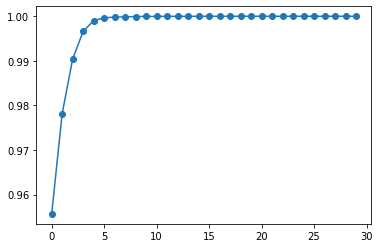

In [65]:
from matplotlib import pyplot as plt
import math
total_ratio = 0
base = [0 for i in range(n_components)]
for i in range(n_components):
    total_ratio += pca.explained_variance_ratio_[i]
    base[i] = total_ratio
    print(total_ratio)
plt.scatter(range(n_components), base)
plt.plot(range(n_components), base)
plt.show()
#print(total_ratio)
#print(pca.explained_variance_)
#train_set_reduction = pca.transform(train_set)
#train_set_reduction[:5]


In [66]:
%%time
#--- train
clf.fit(train_set, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed: 21.2min remaining: 27.0min


CPU times: user 15h 24min 41s, sys: 2min 48s, total: 15h 27min 29s
Wall time: 30min 26s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 30.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    5.8s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.1s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:   29.8s remaining:   38.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.8s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent w

[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:  1.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:  1.6min remaining:  

KeyboardInterrupt: 

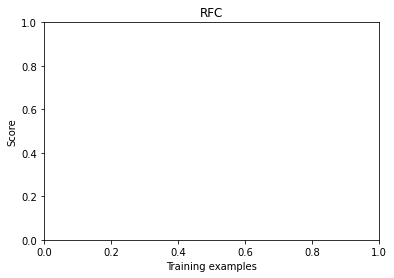

In [7]:

# 定义函数 plot_learning_curve 绘制学习曲线。train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),cv 初始化为 10，以后调用函数时不再输入这两个变量
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(RandomForestClassifier(n_jobs=-1, max_depth=12, min_samples_leaf=50, class_weight='balanced',
                            n_estimators=50, max_features=None, verbose=1), 'RFC', train_set, y) # 调用函数 plot_learning_curve 绘制随机森林学习器学习曲线
                


In [67]:
#--- test
#test_set = np.asarray(list(map(lambda x: np.asarray(x), test["input"])))
test_set = test[test.columns[:-2]]
#test_set_reduction = pca.transform(test_set)
ytest, _ = pd.factorize(test["label"])
ypred = clf.predict(test_set)
ypred_proba = clf.predict_proba(test_set)

# print("model score: ", clf.score(test_set, ytest))
# x = pd.crosstab(ytest, ypred, rownames=["acture"], colnames=["preds"])
# recall_rate = x[1][1] / (x[1][0] + x[1][1])
# prec_rate = x[1][1] / (x[0][1] + x[1][1])
# print("racall is: ", recall_rate, "prec is:", prec_rate)
# x


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.8s finished


In [68]:
print(ypred_proba[:,1])

[1.47232824e-06 1.66840998e-05 8.03637789e-07 ... 8.65484439e-08
 5.47331226e-07 8.65484439e-08]


In [76]:
def my_predict(clf, data):
    proba = clf.predict_proba(data)
    return np.asarray([1 if x > 0.2 else 0 for x in proba[:,1]])

In [72]:
test_truth = len(test[test['label'] == 1])
test_total = len(test)
#ypred = my_predict(clf, test_set)
correct_count = 0
for i in range(len(test)):
    if ypred[i] == 1 and ytest[i] == 1:
        correct_count += 1
print("total truth number:", len(ytest[ytest == 1]))
print("length of ypred is positive: {0} of {1} truth".format(len(ypred[ypred == 1]), correct_count))

correct_count = 0
for i in range(len(test)):
    if ypred_proba[i][1] >= 0.2 and ytest[i] == 1:
        correct_count += 1
pred_positive_lg8 = ypred_proba[ypred_proba[:,1] > 0.2]
print("length of ypred_proba is positive: {} of {} truth".format(len(pred_positive_lg8), correct_count))
print(test_truth, test_total, len(pred_positive_lg8))

total truth number: 9194
length of ypred is positive: 12046 of 8386 truth
length of ypred_proba is positive: 16021 of 8741 truth
9194 3188777 16021


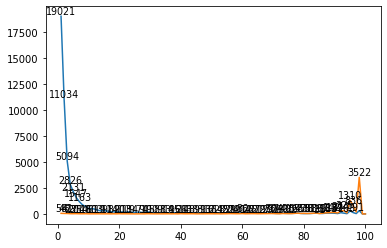

In [75]:
from matplotlib import pyplot as plt
p0 = [int(100 * x) for x in ypred_proba[:,0]]
p1 = [int(100 * x) for x in ypred_proba[:,1]]
arr = [0]*101
arr2 = [0]*101
for i in range(len(p0)):
    arr[p1[i]] += (ytest[i] - 1)
    arr2[p1[i]] += ytest[i]
    
arr = [-1 * x for x in arr]

x_data = range(1, 101)
y_data = arr[1:]
y_data2 = arr2[1:]
plt.plot(x_data,y_data)
plt.plot(x_data, y_data2)
for x, y in zip(x_data, y_data):
    if y <= 1000:
        continue
    plt.text(x, y+0.3, str(y), ha='center', va='bottom', fontsize=9.5)
for x, y in zip(x_data, y_data2):
    if y == 0:
        continue
    plt.text(x, y+0.3, str(y), ha='center', va='bottom', fontsize=9.5)
#plt.scatter(p1, ytest)

In [89]:
#---- store modle ----#
# import pickle

# with open("./models/ramdom_forest_model.pkl", "wb") as f:
#     pickle.dump(clf, f)

import joblib
joblib.dump(clf, './models/somSNV_notbalanced_nodownsample_5truth_positvlg0d2.pkl', compress=9) 

['./models/somSNV_notbalanced_nodownsample_5truth_positvlg0d2.pkl']

In [85]:
%%time
#------------- use trained model to filter variants ----------------------#

import joblib
import numpy as np
import pandas as pd
#out_file = "/home/old_home/haoz/workspace/FastVC/detection_result/somatic/train_set_10_21/FDSynthetic.notloose.txt"
out_file = "/home/old_home/haoz/workspace/FastVC/detection_result/FD_DATASET/FD_DATA_2.txt"
#out_file = "/home/old_home/haoz/workspace/FastVC/detection_result/SJZP/B1701_B17NC.txt"
cr = list()
raw = list()
with open(out_file, 'r') as f:
    for var in f:
        if var[0] == '#':
            continue
        items = var.strip().split('\t')
        if(len(items) == 61): #36 or 38(fisher)
            if items[fe2i["VarType"]] != "SNV": #judge if snv
                continue
            key, data_line = format_snv_data_item(items, True)
            cr.append(data_line)
            raw.append(var)
        else:
            print("wrong data format!!", len(items))
if False:               
    clf = joblib.load("/home/old_home/haoz/workspace/FastVC/RandomForest/models/random_forest_model_somatic_indel_0d02_balanced.pkl")

call_data = np.asarray(cr)
#pred = clf.predict(call_data)

pred = my_predict(clf, call_data)

'''
ypred = clf.predict(test_set)
x = pd.crosstab(ytest, ypred, rownames=["acture"], colnames=["preds"])
correct_rate = x[0][1] / (x[0][1] + x[1][1])
print("error_rate is: ", correct_rate)
x
'''

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    1.4s remaining:    1.8s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    2.0s finished


CPU times: user 5min 9s, sys: 41.7 s, total: 5min 50s
Wall time: 5min 15s


'\nypred = clf.predict(test_set)\nx = pd.crosstab(ytest, ypred, rownames=["acture"], colnames=["preds"])\ncorrect_rate = x[0][1] / (x[0][1] + x[1][1])\nprint("error_rate is: ", correct_rate)\nx\n'

In [86]:
with open("./RandomForest_Filtered.txt", 'w') as f:
    for i in range(len(pred)):
        if pred[i] == 1:
            f.write(str(raw[i]))

In [87]:
!cat ./RandomForest_Filtered.txt | /home/old_home/haoz/workspace/FastVC/scripts/var2vcf_paired.pl -A -f 0.01 > RandomForest_Filtered.vcf

perl: warning: Setting locale failed.
perl: warning: Please check that your locale settings:
	LANGUAGE = (unset),
	LC_ALL = (unset),
	LC_CTYPE = "C.UTF-8",
	LANG = "zh_CN.UTF-8"
    are supported and installed on your system.
perl: warning: Falling back to the standard locale ("C").


In [88]:
! /home/old_home/haoz/tools/happy/bin/som.py \
	/home/old_home/haoz/workspace/data/FD/Truth/FDtruth_Data_2.snv.vcf \
	/home/old_home/haoz/workspace/FastVC/RandomForest/RandomForest_Filtered.vcf \
	-o tmp \
	-r /home/old_home/haoz/workspace/data/hg38/hg38.fa \
	--verbose 2> /dev/null \
&& echo "FD data indel result:" \
&& head -n 3 tmp.stats.csv | column -s, -t -H 8,9,11,12,13,15,16,17,18,19,20,21,22 


FD data indel result:
   type     total.truth  total.query  tp     fp     fn    recall              precision
1  SNVs     39525        61966        35740  26226  3785  0.9042378241619229  0.5767679049801504
5  records  39525        61966        35740  26226  3785  0.9042378241619229  0.5767679049801504


In [147]:
! ls /home/old_home/haoz/workspace/FastVC/RandomForest/models/

automl_model_full_python.pkl
automl_model.pkl
model_desc.org
ramdom_forest_model_fisher.pkl
ramdom_forest_model_somatic.pkl
ramdom_forest_model_somatic_test0d001.pkl
ramdom_forest_model_somatic_test0d01.pkl
ramdom_forest_model_somatic_test0d02.pkl
ramdom_forest_model_somatic_test0d1.pkl
ramdom_forest_model_somatic_test.pkl
random_forest_model_somatic_indel0d005.pkl
random_forest_model_somatic_indel_0d02_balanced.pkl
random_forest_model_somatic_indel0d02.pkl
random_forest_model_somatic_indel_balanced.pkl
tmp.pkl


In [ ]:
	/home/old_home/haoz/workspace/data/FD/Truth/FDtruth_Data_2.snv.vcf \
    /home/old_home/haoz/workspace/data/FD/trainingSet_10_21/synthetic_snvs.vcf \